In [147]:
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
import json


In [191]:
file_path = r'D:\\Documents\\Mémoire\\Data John Doe\\John Doe gaitway 3D locomotion_R14.txt'
output_file = r'D:\\Documents\\Mémoire\\Data John Doe\\ResultPython_JD_R14.txt'

seuil_v=3.8
seuil_p=4

MIN_TIME_DIFF = 0.250
MAX_TIME_DIFF = 0.350

In [177]:
# Lire le fichier en ignorant les 43 premières lignes
data = pd.read_csv(file_path, delimiter='\t', header=None, skiprows=44)

# Extraire les colonnes nécessaires
time = data[0]
speed = data[19]
contact_mode = data[31]

# Initialiser les listes pour stocker les vallées, les pics et les transitions de contact mode
vallees = []
pics = []
transitions = []

# Previous value, should be "PIC", or "VAL"
was_previous = None

# Calculer la moyenne mobile
moving_average = speed.rolling(window=21, center=True).mean()

In [150]:
moving_average

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
19995   NaN
19996   NaN
19997   NaN
19998   NaN
19999   NaN
Name: 19, Length: 20000, dtype: float64

In [151]:
 previous_type = None

averages_vals = []

vallees = []
pics = []

# Détecter les vallées et les pics
for i in range(10, len(moving_average) - 10):
    if pd.notna(moving_average[i]):  # Vérifier que la valeur n'est pas NaN
        window = moving_average[i - 10:i + 11]
        min_value = window.min()
        max_value = window.max()

        is_vallee = moving_average[i] == min_value and moving_average[i] < seuil_v
        is_pic = moving_average[i] == max_value and moving_average[i] > seuil_p

        averages_vals.append((time[i], moving_average[i], ''))

        # Vérifier les pics
        if is_pic and previous_type != "pic":
            pics.append((time[i], moving_average[i], 'Pic'))
            previous_type = "pic"

        # Vérifier les vallées
        elif is_vallee and previous_type != "val":
            vallees.append((time[i], moving_average[i], 'Vallée'))
            previous_type = "val"

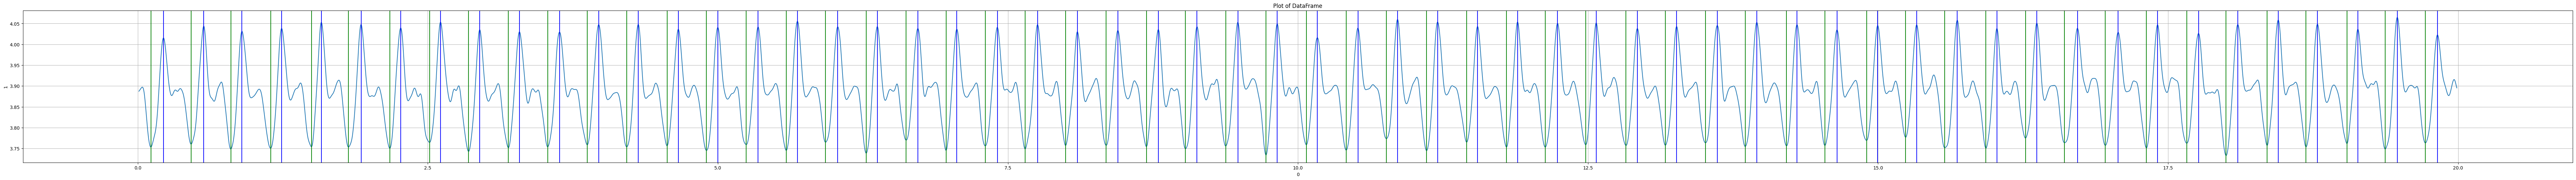

In [152]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))
pics_df = pd.DataFrame(pics)
vallees_df = pd.DataFrame(vallees)
averages_vals_df = pd.DataFrame(averages_vals)

plt.plot(averages_vals_df[0], averages_vals_df[1])

for i in range(len(vallees_df)):
    plt.axvline(x=vallees_df[0][i], color='green', label='vallees' if i == 0 else "")

for i in range(len(pics_df)):
    plt.axvline(x=pics_df[0][i], color='blue', label='pics' if i == 0 else "")

plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [153]:
transitions = []

previous_mode = None
for i in range(len(contact_mode)):
    if pd.notna(contact_mode[i]):
        current_mode = contact_mode[i]
        if (previous_mode is None or previous_mode != 'SC') and current_mode == 'SC':
            transitions.append((time[i], 'Transition'))
        previous_mode = current_mode
            

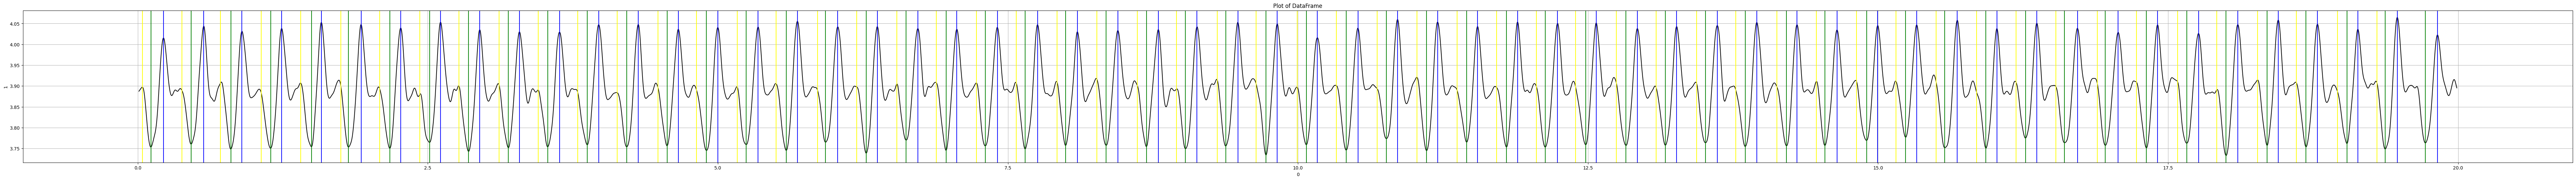

In [154]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))
pics_df = pd.DataFrame(pics)
vallees_df = pd.DataFrame(vallees)
averages_vals_df = pd.DataFrame(averages_vals)
transitions_df = pd.DataFrame(transitions)

plt.plot(averages_vals_df[0], averages_vals_df[1], color="black")

for i in range(len(vallees_df)):
    plt.axvline(x=vallees_df[0][i], color='green', label='vallees' if i == 0 else "")

for i in range(len(pics_df)):
    plt.axvline(x=pics_df[0][i], color='blue', label='pics' if i == 0 else "")

for i in range(len(transitions_df)):
    plt.axvline(x=transitions_df[0][i], color='yellow', label='transitions' if i == 0 else "")

plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [155]:
# Créer des DataFrames pour les vallées, les pics et les transitions
df_vallees = pd.DataFrame(vallees, columns=['Temps (ms)', 'Vitesse (m/s)', 'Type'])
df_pics = pd.DataFrame(pics, columns=['Temps (ms)', 'Vitesse (m/s)', 'Type'])
df_transitions = pd.DataFrame(transitions, columns=['Temps (ms)', 'Type'])



In [156]:
df_vallees

,Temps (ms),Vitesse (m/s),Type
0,0.113,3.753376,Vallée
1,0.460,3.760543,Vallée
2,0.802,3.748767,Vallée
3,1.145,3.750800,Vallée
4,1.497,3.754252,Vallée
5,1.816,3.753400,Vallée
6,2.172,3.750610,Vallée
7,2.515,3.764662,Vallée
8,2.851,3.743024,Vallée
9,3.195,3.751814,Vallée


In [157]:

# Calculer la différence de temps entre chaque valeur x+1 et x
df_vallees['Différence de Temps (ms)'] = df_vallees['Temps (ms)'].diff().shift(-1).abs()
df_pics['Différence de Temps (ms)'] = df_pics['Temps (ms)'].diff().shift(-1).abs()
df_transitions['Différence de Temps (ms)'] = df_transitions['Temps (ms)'].diff().shift(-1).abs()


In [158]:

# Arrondir les valeurs de vitesse et de différence de temps
df_vallees['Vitesse (m/s)'] = df_vallees['Vitesse (m/s)'].round(5)
df_pics['Vitesse (m/s)'] = df_pics['Vitesse (m/s)'].round(5)
df_vallees['Différence de Temps (ms)'] = df_vallees['Différence de Temps (ms)'].round(4)
df_pics['Différence de Temps (ms)'] = df_pics['Différence de Temps (ms)'].round(4)
df_transitions['Différence de Temps (ms)'] = df_transitions['Différence de Temps (ms)'].round(4)

In [159]:
print("vallees:")
df_vallees


vallees:


,Temps (ms),Vitesse (m/s),Type,Différence de Temps (ms)
0,0.113,3.75338,Vallée,0.347
1,0.460,3.76054,Vallée,0.342
2,0.802,3.74877,Vallée,0.343
3,1.145,3.75080,Vallée,0.352
4,1.497,3.75425,Vallée,0.319
5,1.816,3.75340,Vallée,0.356
6,2.172,3.75061,Vallée,0.343
7,2.515,3.76466,Vallée,0.336
8,2.851,3.74302,Vallée,0.344
9,3.195,3.75181,Vallée,0.338


In [192]:
def check_values(df):
    if not df.empty:
        errors = []
        df['Errors'] = [None] * len(df['Différence de Temps (ms)'])
        # Vérifier les différences de temps pour les valeurs
        for index, row in df.iterrows():
            if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                df.loc[index, "Errors"] = "ERR"
                errors.append(index)

        if len(errors) > 0:
            msg = ', '.join(map(str, errors))
            print(f"{len(errors)} Erreurs sur les index {msg}\n")

if vallees is not None and pics is not None and transitions is not None:
    print("Vérification pour vallees\n")
    check_values(df_vallees)
    print("Vérification pour pics\n")
    check_values(df_pics)
    print("Vérification pour transitions\n")
    check_values(df_transitions)

Vérification pour vallees

9 Erreurs sur les index 3, 5, 40, 42, 45, 48, 49, 52, 54

Vérification pour pics

5 Erreurs sur les index 26, 36, 38, 48, 50

Vérification pour transitions

13 Erreurs sur les index 12, 14, 16, 22, 26, 28, 30, 36, 40, 48, 50, 52, 54



In [193]:
def write_results_to_file(vallees, pics, transitions, output_file):
    with open(output_file, 'w') as f:
        f.write("Vallées détectées:\t")
        if not vallees.empty:
            f.write(f"({len(vallees)})\n")
            vallees.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les vallées
            for index, row in vallees.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les vallées\n")
        else:
            f.write("Aucune vallée détectée.\n")

        f.write("\nPics détectés:\n")
        if not pics.empty:
            pics.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les pics
            for index, row in pics.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les pics\n")
        else:
            f.write("Aucun pic détecté.\n")

        f.write("\nTransitions de contact_mode détectées:\t")
        if not transitions.empty:
            f.write(f"({len(vallees)})\n")
            transitions.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les transitions
            for index, row in transitions.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les transitions\n")
        else:
            f.write("Aucune transition détectée.\n")

def write_results_to_excel(vallees, pics, transitions, output_file):
    # Create a Pandas Excel writer using XlsxWriter as the engine
    with pd.ExcelWriter(output_file) as writer:
        # Write each dataframe to a different worksheet
        vallees.to_excel(writer, sheet_name='Vallées', index=False)
        pics.to_excel(writer, sheet_name='Pics', index=False)
        transitions.to_excel(writer, sheet_name='Transitions', index=False)

    print(f"Dataframes were successfully written to {output_file}")

if vallees is not None and pics is not None and transitions is not None:
    write_results_to_file( df_vallees, df_pics, df_transitions, output_file)
    write_results_to_excel(df_vallees, df_pics, df_transitions, output_file.replace(".txt", ".xlsx"))
    print(f"Les résultats ont été écrits dans le fichier : {output_file}")

Dataframes were successfully written to D:\\Documents\\Mémoire\\Data John Doe\\ResultPython_JD_R14.xlsx
Les résultats ont été écrits dans le fichier : D:\\Documents\\Mémoire\\Data John Doe\\ResultPython_JD_R14.txt


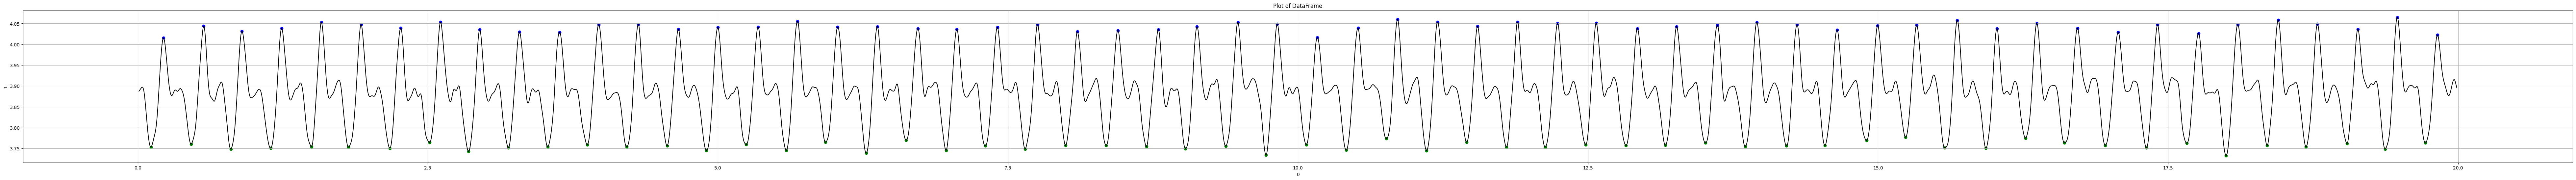

In [162]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))


plt.scatter(df_vallees['Temps (ms)'], df_vallees['Vitesse (m/s)'],  color='green', label='vallees')
plt.scatter(df_pics['Temps (ms)'], df_pics['Vitesse (m/s)'],  color='blue', label='pics')
plt.plot(averages_vals_df[0], averages_vals_df[1], color="black")
# plt.scatter(df_transitions['Temps (ms)'], df_transitions['Différence de Temps (ms)'],  color='yellow', label='transitions')

plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [163]:
averages_vals_df.to_excel('data.xlsx', sheet_name="averages_vals", index=False)

In [164]:
# Compare differences


In [165]:
vallees_diff = df_vallees['Différence de Temps (ms)'].dropna().values
pics_diff = df_pics['Différence de Temps (ms)'].dropna().values
transitions_diff = df_transitions['Différence de Temps (ms)'].dropna().values

In [166]:
min_len = min(len(vallees_diff), len(pics_diff), len(transitions_diff))

vallees_diff = vallees_diff[:min_len]
pics_diff = pics_diff[:min_len]
transitions_diff = transitions_diff[:min_len]

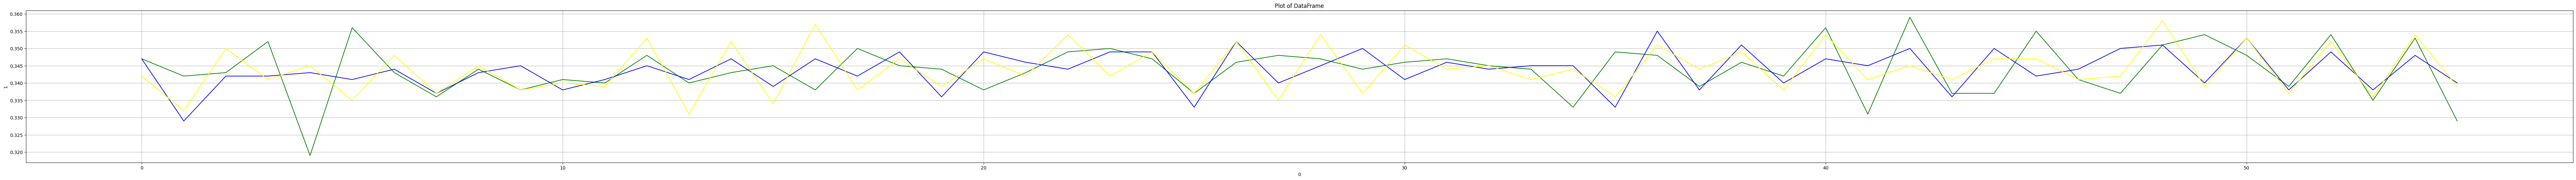

In [167]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))


plt.plot(vallees_diff,  color='green', label='vallees')
plt.plot(pics_diff,  color='blue', label='pics')
plt.plot(transitions_diff,  color='yellow', label='transitions')

plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [170]:
# correlation = pd.DataFrame()

# correlation['vallees'] = vallees_diff
# correlation['pics'] = pics_diff
# correlation['transitions'] = transitions_diff

# print(correlation.corr())

corr_vallees_trans = np.corrcoef(vallees_diff, transitions_diff)[0, 1]
corr_pics_trans = np.corrcoef(pics_diff, transitions_diff)[0, 1]

print(corr_vallees_trans, corr_pics_trans)

0.26244823079637475 0.6484588218122042
